In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Problem Statement**


A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [7]:
df_train=pd.read_csv('/content/train.csv')
df_train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [8]:
df_test=pd.read_csv('/content/test.csv')
df_test.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [9]:
df=df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504645 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     504645 non-null  int64  
 1   Product_ID                  504645 non-null  object 
 2   Gender                      504645 non-null  object 
 3   Age                         504645 non-null  object 
 4   Occupation                  504644 non-null  float64
 5   City_Category               504644 non-null  object 
 6   Stay_In_Current_City_Years  504644 non-null  object 
 7   Marital_Status              504644 non-null  float64
 8   Product_Category_1          504644 non-null  float64
 9   Product_Category_2          348351 non-null  float64
 10  Product_Category_3          154105 non-null  float64
 11  Purchase                    271045 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 50.1+ MB


In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.046450e+05,504644.000000,504644.000000,504644.000000,348351.000000,154105.000000,271045.000000
mean,1.003019e+06,8.078441,0.409800,5.285570,9.847223,12.662814,9320.462170
std,1.722568e+03,6.521020,0.491797,3.741159,5.090600,4.127610,4972.378115
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001510e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5863.000000
50%,1.003066e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8060.000000
75%,1.004461e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12061.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [12]:
df.drop(['User_ID'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [18]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [19]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', '2'],
      dtype=object)

In [20]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,1.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,1.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,1.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,7.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [21]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,6,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [22]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [23]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [24]:
df.drop('City_Category',axis=1,inplace=True)  #axis=1 column wise and axis=0 row wise
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10.0,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10.0,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10.0,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16.0,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [25]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            156294
Product_Category_3            350540
Purchase                      233600
B                                  0
C                                  0
dtype: int64

In [26]:
#relpacing missing values
df['Product_Category_2'].value_counts()

8.0     59033
14.0    51164
2.0     45688
16.0    39979
15.0    35016
5.0     24000
4.0     23830
6.0     15277
11.0    13147
17.0    12408
13.0     9784
9.0      5316
12.0     5039
10.0     2810
3.0      2679
18.0     2637
7.0       544
Name: Product_Category_2, dtype: int64

In [27]:
df['Product_Category_2'].mode()[0]

8.0

In [28]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_2'].isnull().sum()

0

In [29]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [30]:
df['Product_Category_3'].value_counts()

16.0    30009
15.0    25844
14.0    17039
17.0    15495
5.0     15457
8.0     11571
9.0     10797
12.0     8487
13.0     5049
6.0      4434
18.0     4267
4.0      1755
11.0     1702
10.0     1626
3.0       573
Name: Product_Category_3, dtype: int64

In [31]:
df['Product_Category_3'].mode()[0]

16.0

In [32]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum()

0

In [33]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10.0,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10.0,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10.0,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16.0,4+,0.0,8.0,8.0,16.0,7969.0,0,1


In [34]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [35]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [36]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10.0,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10.0,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10.0,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16.0,4,0.0,8.0,8.0,16.0,7969.0,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504645 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  504645 non-null  object 
 1   Gender                      504645 non-null  int64  
 2   Age                         504645 non-null  int64  
 3   Occupation                  504644 non-null  float64
 4   Stay_In_Current_City_Years  504644 non-null  object 
 5   Marital_Status              504644 non-null  float64
 6   Product_Category_1          504644 non-null  float64
 7   Product_Category_2          504645 non-null  float64
 8   Product_Category_3          504645 non-null  float64
 9   Purchase                    271045 non-null  float64
 10  B                           504645 non-null  uint8  
 11  C                           504645 non-null  uint8  
dtypes: float64(6), int64(2), object(2), uint8(2)
memory usage: 59.4+ MB


In [40]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

ValueError: ignored

In [39]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 504645 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  504645 non-null  object 
 1   Gender                      504645 non-null  int64  
 2   Age                         504645 non-null  int64  
 3   Occupation                  504644 non-null  float64
 4   Stay_In_Current_City_Years  504644 non-null  object 
 5   Marital_Status              504644 non-null  float64
 6   Product_Category_1          504644 non-null  float64
 7   Product_Category_2          504645 non-null  float64
 8   Product_Category_3          504645 non-null  float64
 9   Purchase                    271045 non-null  float64
 10  B                           504645 non-null  int64  
 11  C                           504645 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 66.2+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


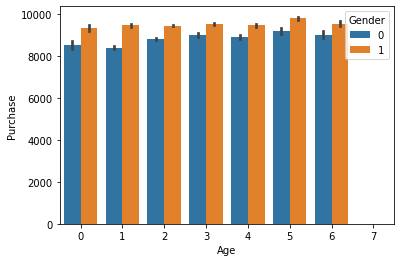

In [42]:
sns.barplot('Age','Purchase',hue='Gender',data=df)

# **Purchasing of men is high then women**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


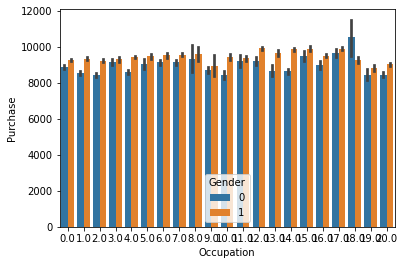

In [43]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


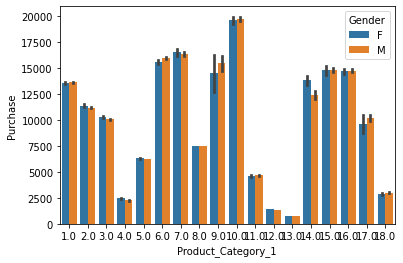

In [13]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


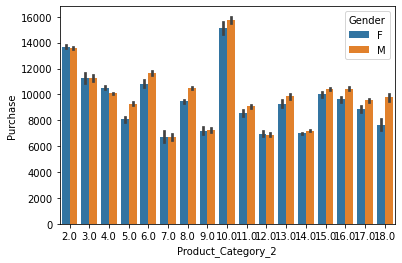

In [14]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


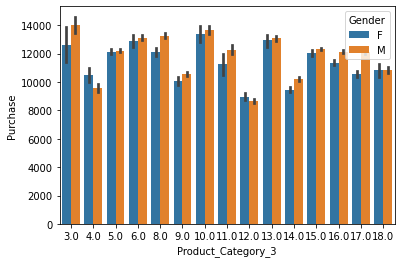

In [15]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [16]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [46]:
#feature scaling
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]
X=df_train.drop('Purchase',axis=1)
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,0,10.0,2,0.0,3.0,8.0,16.0,0,0
1,P00248942,0,0,10.0,2,0.0,1.0,6.0,14.0,0,0
2,P00087842,0,0,10.0,2,0.0,12.0,8.0,16.0,0,0
3,P00085442,0,0,10.0,2,0.0,12.0,14.0,16.0,0,0
4,P00285442,1,6,16.0,4,0.0,8.0,8.0,16.0,0,1


In [48]:
X.shape

(271045, 11)

In [49]:
y=df_train['Purchase']

In [50]:
y.shape

(271045,)

In [51]:
y.shape

(271045,)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)


In [59]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)